# Installing the AugLy library



In [1]:
# Clone the repository
!git clone https://github.com/facebookresearch/AugLy.git

Cloning into 'AugLy'...
remote: Enumerating objects: 4384, done.
remote: Counting objects: 100% (787/787), done.
remote: Compressing objects: 100% (152/152), done.
remote: Total 4384 (delta 663), reused 636 (delta 635), pack-reused 3597
Receiving objects: 100% (4384/4384), 353.04 MiB | 31.81 MiB/s, done.
Resolving deltas: 100% (1874/1874), done.
Updating files: 100% (1901/1901), done.


In [1]:
# Install the dependencies required to use Augly.
# After installing Augly, restart the runtime and re-run this cell
%cd AugLy/
!pip install -e .

/content/AugLy
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/AugLy
  Preparing metadata (setup.py) ... done
  Attempting uninstall: augly
    Found existing installation: augly 1.0.0
    Uninstalling augly-1.0.0:
      Successfully uninstalled augly-1.0.0
  Running setup.py develop for augly
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-magic is already the newest version (2:0.4.15-3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


# Mounting the Google Drive disk

In [2]:
# Mount Google Drive to provide access to my files
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

Mounted at /content/gdrive
'Colab Notebooks'		  ml_reciclaje
 confusion_matrix.ipynb		 'My Drive'
 deep_learning			  normalImages.zip
 dummy_augmented		 'resultados modelo yolov4.gsheet'
 images_to_train_with_augmented   Tesis
 IMG_20220911_213738.jpg	  yolov3_augmented
 IMG_20220911_213826.jpg	  yolov3_with_dummies_full_augmented
 IMG_20220911_213853.jpg	  yolov4_augmented
 ITAM				  yolov4_images_to_train_plus_two_folders_dummy
 map.gsheet			  yolov4_with_dummies_full_augmented


# Install augly

In [1]:
!pip install augly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.3/24.3 MB 8.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.4/294.4 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 6.5 MB/s eta 0:00:00
  Created wheel for iopath: filename=iopath-0.1.10-py3-none-any.whl size=31532 sha256=a23b4e56b3289debf5fd77f22f064246f91e763c7a21b1be9960c2aad9a9f35d
  Stored in directory: /Users/brandon/Library/Caches/pip/wheels/2f/ce/ac/07529e6caba9b9c9c78a3cdae0a21c52ed14b37f98599eab74
Successfully built iopath


# Preprocessing

In [4]:
# Import the libraries needed for processing and visualization
import PIL
import os
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
import glob

In [6]:
%cd ../data

/Users/brandon/Documents/MCD/2do_semestre/image-denoising-radiographics/data


In [9]:
# Create directories to store the preprocessing outputs
!mkdir "preprocessed/"
!mkdir "preprocessed/train"
!mkdir "preprocessed/valid"

In [10]:
def prop_black_pixels(image):
  num_black_pixels = np.sum(image <= 30)
  return num_black_pixels / image.size

## Train

In [12]:
# Retrieve the images only
train_images_path = os.path.join("DL_images", "train")
train_images_list = glob.glob(os.path.join(train_images_path, "*.png"))
train_images_list.sort()
print(len(train_images_list))
for i in range(5):
  print(train_images_list[i])

36808
DL_images/train/image_1.png
DL_images/train/image_10.png
DL_images/train/image_100.png
DL_images/train/image_1000.png
DL_images/train/image_10000.png


In [13]:
pbp_array = []
width_array = []
height_array = []
for image in train_images_list:
  tmp_image = cv.imread(image, cv.IMREAD_GRAYSCALE)
  pbp = prop_black_pixels(tmp_image)
  pbp_array.append(pbp)
  if pbp <= 0.6:
    h, w = tmp_image.shape
    width_array.append(w)
    height_array.append(h)

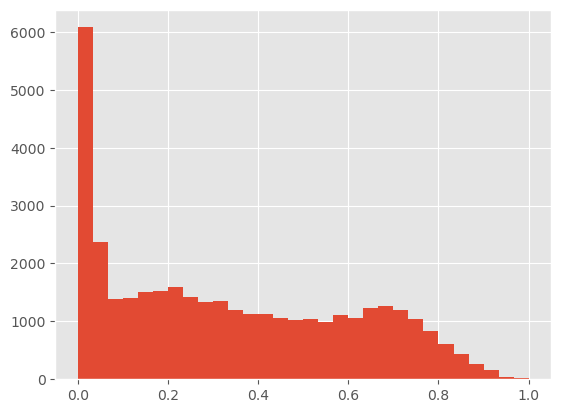

In [14]:
plt.style.use('ggplot')
plt.hist(pbp_array, bins=30)
plt.show()

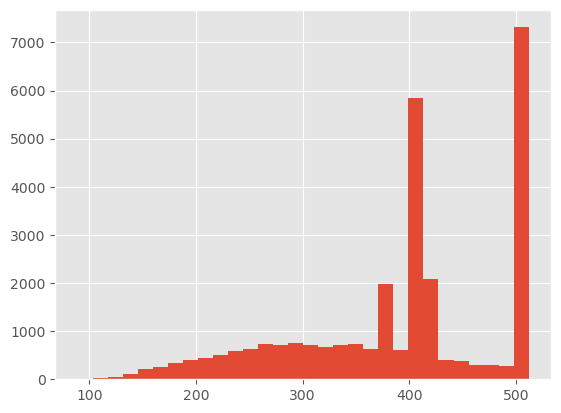

In [15]:
plt.style.use('ggplot')
plt.hist(width_array, bins=30)
plt.show()

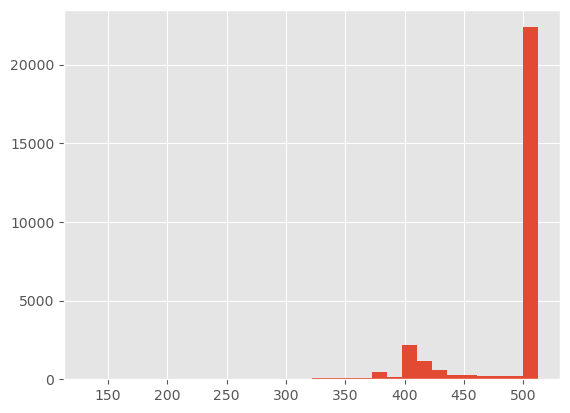

In [16]:
plt.style.use('ggplot')
plt.hist(height_array, bins=30)
plt.show()

In [17]:
width_array = []
height_array = []

for image in train_images_list:
  tmp_image = cv.imread(image, cv.IMREAD_GRAYSCALE)
  pbp = prop_black_pixels(tmp_image)
  if pbp <= 0.6:
    h, w = tmp_image.shape
    if w > h:
      tmp_image = cv.rotate(tmp_image, cv.ROTATE_90_CLOCKWISE)
      w, h = h, w
    width_array.append(w)
    height_array.append(h)

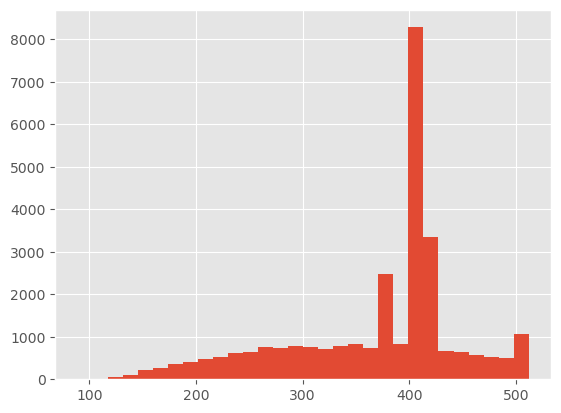

In [18]:
plt.style.use('ggplot')
plt.hist(width_array, bins=30)
plt.show()

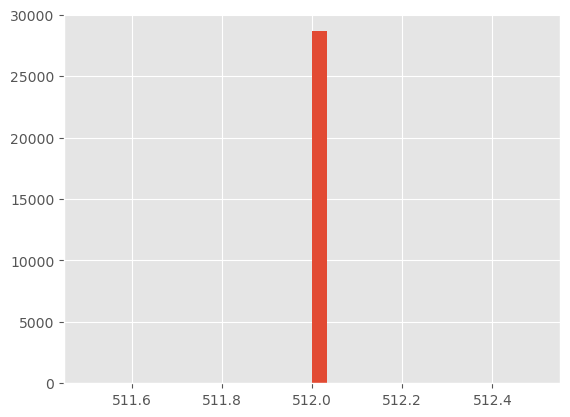

In [19]:
plt.style.use('ggplot')
plt.hist(height_array, bins=30)
plt.show()

In [20]:
print(min(height_array), max(height_array))

512 512


In [22]:
# Convert the images to gray scale. Then reshape and save them
output_train_preprocessed = "preprocessed/train"
img_count = 1

train_paths = []

for image in train_images_list:
  tmp_image = cv.imread(image, cv.IMREAD_GRAYSCALE)
  pbp = prop_black_pixels(tmp_image)
  if pbp <= 0.6:
    h, w = tmp_image.shape
    if w > h:
      tmp_image = cv.rotate(tmp_image, cv.ROTATE_90_CLOCKWISE)
    if w > 250:  
      tmp_resized = cv.resize(tmp_image, (400,512), interpolation = cv.INTER_AREA)
      name = f'{output_train_preprocessed}/{img_count}_train.png'
      print(name)
      cv.imwrite(name, tmp_resized)
      train_paths.append(name)
      img_count += 1

preprocessed/train/1_train.png
preprocessed/train/2_train.png
preprocessed/train/3_train.png
preprocessed/train/4_train.png
preprocessed/train/5_train.png
preprocessed/train/6_train.png
preprocessed/train/7_train.png
preprocessed/train/8_train.png
preprocessed/train/9_train.png
preprocessed/train/10_train.png
preprocessed/train/11_train.png
preprocessed/train/12_train.png
preprocessed/train/13_train.png
preprocessed/train/14_train.png
preprocessed/train/15_train.png
preprocessed/train/16_train.png
preprocessed/train/17_train.png
preprocessed/train/18_train.png
preprocessed/train/19_train.png
preprocessed/train/20_train.png
preprocessed/train/21_train.png
preprocessed/train/22_train.png
preprocessed/train/23_train.png
preprocessed/train/24_train.png
preprocessed/train/25_train.png
preprocessed/train/26_train.png
preprocessed/train/27_train.png
preprocessed/train/28_train.png
preprocessed/train/29_train.png
preprocessed/train/30_train.png
preprocessed/train/31_train.png
preprocessed/trai

In [54]:
train_paths.sort()
train_paths

['preprocessed/train/10000_train.png',
 'preprocessed/train/10001_train.png',
 'preprocessed/train/10002_train.png',
 'preprocessed/train/10003_train.png',
 'preprocessed/train/10004_train.png',
 'preprocessed/train/10005_train.png',
 'preprocessed/train/10006_train.png',
 'preprocessed/train/10007_train.png',
 'preprocessed/train/10008_train.png',
 'preprocessed/train/10009_train.png',
 'preprocessed/train/1000_train.png',
 'preprocessed/train/10010_train.png',
 'preprocessed/train/10011_train.png',
 'preprocessed/train/10012_train.png',
 'preprocessed/train/10013_train.png',
 'preprocessed/train/10014_train.png',
 'preprocessed/train/10015_train.png',
 'preprocessed/train/10016_train.png',
 'preprocessed/train/10017_train.png',
 'preprocessed/train/10018_train.png',
 'preprocessed/train/10019_train.png',
 'preprocessed/train/1001_train.png',
 'preprocessed/train/10020_train.png',
 'preprocessed/train/10021_train.png',
 'preprocessed/train/10022_train.png',
 'preprocessed/train/10023_

In [55]:
train_paths_str = "\n".join(train_paths)
with open("preprocessed_train.txt", 'w') as f:
  f.write(train_paths_str)
f.close()

In [56]:
!wc -l preprocessed_train.txt

   25461 preprocessed_train.txt


## Valid

In [25]:
# Retrieve the images only
valid_images_path = os.path.join("DL_images", "valid")
valid_images_list = glob.glob(os.path.join(valid_images_path, "*.png"))
valid_images_list.sort()
print(len(valid_images_list))
for i in range(5):
  print(valid_images_list[i])

3197
DL_images/valid/image_1.png
DL_images/valid/image_10.png
DL_images/valid/image_100.png
DL_images/valid/image_1000.png
DL_images/valid/image_1001.png


In [27]:
# Convert the images to gray scale. Then reshape and save them
output_valid_preprocessed = "preprocessed/valid"
img_count = 1

valid_paths = []

for image in valid_images_list:
  tmp_image = cv.imread(image, cv.IMREAD_GRAYSCALE)
  pbp = prop_black_pixels(tmp_image)
  if pbp <= 0.6:
    h, w = tmp_image.shape
    if w > h:
      tmp_image = cv.rotate(tmp_image, cv.ROTATE_90_CLOCKWISE)
    if w > 250:
      tmp_resized = cv.resize(tmp_image, (400,500), interpolation = cv.INTER_AREA)
      name = f'{output_valid_preprocessed}/{img_count}_valid.png'
      print(name)
      cv.imwrite(name, tmp_resized)
      valid_paths.append(name)
      img_count += 1

preprocessed/valid/1_valid.png
preprocessed/valid/2_valid.png
preprocessed/valid/3_valid.png
preprocessed/valid/4_valid.png
preprocessed/valid/5_valid.png
preprocessed/valid/6_valid.png
preprocessed/valid/7_valid.png
preprocessed/valid/8_valid.png
preprocessed/valid/9_valid.png
preprocessed/valid/10_valid.png
preprocessed/valid/11_valid.png
preprocessed/valid/12_valid.png
preprocessed/valid/13_valid.png
preprocessed/valid/14_valid.png
preprocessed/valid/15_valid.png
preprocessed/valid/16_valid.png
preprocessed/valid/17_valid.png
preprocessed/valid/18_valid.png
preprocessed/valid/19_valid.png
preprocessed/valid/20_valid.png
preprocessed/valid/21_valid.png
preprocessed/valid/22_valid.png
preprocessed/valid/23_valid.png
preprocessed/valid/24_valid.png
preprocessed/valid/25_valid.png
preprocessed/valid/26_valid.png
preprocessed/valid/27_valid.png
preprocessed/valid/28_valid.png
preprocessed/valid/29_valid.png
preprocessed/valid/30_valid.png
preprocessed/valid/31_valid.png
preprocessed/vali

In [60]:
valid_paths.sort()
valid_paths

['preprocessed/valid/1000_valid.png',
 'preprocessed/valid/1001_valid.png',
 'preprocessed/valid/1002_valid.png',
 'preprocessed/valid/1003_valid.png',
 'preprocessed/valid/1004_valid.png',
 'preprocessed/valid/1005_valid.png',
 'preprocessed/valid/1006_valid.png',
 'preprocessed/valid/1007_valid.png',
 'preprocessed/valid/1008_valid.png',
 'preprocessed/valid/1009_valid.png',
 'preprocessed/valid/100_valid.png',
 'preprocessed/valid/1010_valid.png',
 'preprocessed/valid/1011_valid.png',
 'preprocessed/valid/1012_valid.png',
 'preprocessed/valid/1013_valid.png',
 'preprocessed/valid/1014_valid.png',
 'preprocessed/valid/1015_valid.png',
 'preprocessed/valid/1016_valid.png',
 'preprocessed/valid/1017_valid.png',
 'preprocessed/valid/1018_valid.png',
 'preprocessed/valid/1019_valid.png',
 'preprocessed/valid/101_valid.png',
 'preprocessed/valid/1020_valid.png',
 'preprocessed/valid/1021_valid.png',
 'preprocessed/valid/1022_valid.png',
 'preprocessed/valid/1023_valid.png',
 'preprocessed

In [61]:
valid_paths_str = "\n".join(valid_paths)
with open("preprocessed_valid.txt", 'w') as f:
  f.write(valid_paths_str)
f.close()

In [62]:
!wc -l preprocessed_valid.txt

    2120 preprocessed_valid.txt


# Gaussian noise

In [65]:
# Create the output folder for the blured images
import augly.image as imaugs
!mkdir "gaussian_images"
!mkdir "gaussian_images/train" 
!mkdir "gaussian_images/valid" 

In [66]:
train_input_path_prefix = os.path.join("preprocessed", "train")
train_output_path_prefix = os.path.join("gaussian_images", "train")

valid_input_path_prefix = os.path.join("preprocessed", "valid")
valid_output_path_prefix = os.path.join("gaussian_images", "valid")

print(train_input_path_prefix)
print(train_output_path_prefix)
print(valid_input_path_prefix)
print(valid_output_path_prefix)

preprocessed/train
gaussian_images/train
preprocessed/valid
gaussian_images/valid


In [67]:
preprocessed_train_images = glob.glob(f'{train_input_path_prefix}/*.png')
preprocessed_valid_images = glob.glob(f'{valid_input_path_prefix}/*.png')
print(len(preprocessed_train_images), len(preprocessed_valid_images))

25462 2121


In [68]:
# Calling the blur function with a radius of 2.3
train_gaussian_paths = []

for image in preprocessed_train_images:
  img_name = image.split('/')[-1]
  new_img_name = img_name[:-4]+"_blured"+img_name[-4:]
  output_path = os.path.join(train_output_path_prefix, new_img_name)
  meta_blur = []
  aug_image = imaugs.blur(image, radius=2.3, output_path=output_path, metadata=meta_blur)
  print(output_path)
  train_gaussian_paths.append(output_path)

gaussian_images/train/3279_train_blured.png
gaussian_images/train/14780_train_blured.png
gaussian_images/train/14263_train_blured.png
gaussian_images/train/14749_train_blured.png
gaussian_images/train/3753_train_blured.png
gaussian_images/train/964_train_blured.png
gaussian_images/train/4345_train_blured.png
gaussian_images/train/20632_train_blured.png
gaussian_images/train/13396_train_blured.png
gaussian_images/train/20318_train_blured.png
gaussian_images/train/13675_train_blured.png
gaussian_images/train/6389_train_blured.png
gaussian_images/train/11670_train_blured.png
gaussian_images/train/155_train_blured.png
gaussian_images/train/18798_train_blured.png
gaussian_images/train/11393_train_blured.png
gaussian_images/train/22637_train_blured.png
gaussian_images/train/6340_train_blured.png
gaussian_images/train/18751_train_blured.png
gaussian_images/train/1756_train_blured.png
gaussian_images/train/25221_train_blured.png
gaussian_images/train/16266_train_blured.png
gaussian_images/trai

In [72]:
train_gaussian_paths.sort()
train_gaussian_paths

['gaussian_images/train/10000_train_blured.png',
 'gaussian_images/train/10001_train_blured.png',
 'gaussian_images/train/10002_train_blured.png',
 'gaussian_images/train/10003_train_blured.png',
 'gaussian_images/train/10004_train_blured.png',
 'gaussian_images/train/10005_train_blured.png',
 'gaussian_images/train/10006_train_blured.png',
 'gaussian_images/train/10007_train_blured.png',
 'gaussian_images/train/10008_train_blured.png',
 'gaussian_images/train/10009_train_blured.png',
 'gaussian_images/train/1000_train_blured.png',
 'gaussian_images/train/10010_train_blured.png',
 'gaussian_images/train/10011_train_blured.png',
 'gaussian_images/train/10012_train_blured.png',
 'gaussian_images/train/10013_train_blured.png',
 'gaussian_images/train/10014_train_blured.png',
 'gaussian_images/train/10015_train_blured.png',
 'gaussian_images/train/10016_train_blured.png',
 'gaussian_images/train/10017_train_blured.png',
 'gaussian_images/train/10018_train_blured.png',
 'gaussian_images/tra

In [73]:
train_gaussian_paths_str = "\n".join(train_gaussian_paths)
with open("gaussian_train.txt", 'w') as f:
  f.write(train_gaussian_paths_str)
f.close()

In [74]:
!wc -l gaussian_train.txt

   25461 gaussian_train.txt


In [77]:
# Calling the blur function with a radius of 2.3
valid_gaussian_paths = []

for image in preprocessed_valid_images:
  img_name = image.split('/')[-1]
  new_img_name = img_name[:-4]+"_blured"+img_name[-4:]
  output_path = os.path.join(valid_output_path_prefix, new_img_name)
  meta_blur = []
  aug_image = imaugs.blur(image, radius=2.3, output_path=output_path, metadata=meta_blur)
  print(output_path)
  valid_gaussian_paths.append(output_path)

gaussian_images/valid/2008_valid_blured.png
gaussian_images/valid/1521_valid_blured.png
gaussian_images/valid/322_valid_blured.png
gaussian_images/valid/608_valid_blured.png
gaussian_images/valid/114_valid_blured.png
gaussian_images/valid/1717_valid_blured.png
gaussian_images/valid/925_valid_blured.png
gaussian_images/valid/787_valid_blured.png
gaussian_images/valid/264_valid_blured.png
gaussian_images/valid/1184_valid_blured.png
gaussian_images/valid/1467_valid_blured.png
gaussian_images/valid/863_valid_blured.png
gaussian_images/valid/1651_valid_blured.png
gaussian_images/valid/1698_valid_blured.png
gaussian_images/valid/578_valid_blured.png
gaussian_images/valid/2072_valid_blured.png
gaussian_images/valid/1906_valid_blured.png
gaussian_images/valid/734_valid_blured.png
gaussian_images/valid/1137_valid_blured.png
gaussian_images/valid/819_valid_blured.png
gaussian_images/valid/1301_valid_blured.png
gaussian_images/valid/502_valid_blured.png
gaussian_images/valid/1592_valid_blured.png

In [78]:
valid_gaussian_paths.sort()
valid_gaussian_paths

['gaussian_images/valid/1000_valid_blured.png',
 'gaussian_images/valid/1001_valid_blured.png',
 'gaussian_images/valid/1002_valid_blured.png',
 'gaussian_images/valid/1003_valid_blured.png',
 'gaussian_images/valid/1004_valid_blured.png',
 'gaussian_images/valid/1005_valid_blured.png',
 'gaussian_images/valid/1006_valid_blured.png',
 'gaussian_images/valid/1007_valid_blured.png',
 'gaussian_images/valid/1008_valid_blured.png',
 'gaussian_images/valid/1009_valid_blured.png',
 'gaussian_images/valid/100_valid_blured.png',
 'gaussian_images/valid/1010_valid_blured.png',
 'gaussian_images/valid/1011_valid_blured.png',
 'gaussian_images/valid/1012_valid_blured.png',
 'gaussian_images/valid/1013_valid_blured.png',
 'gaussian_images/valid/1014_valid_blured.png',
 'gaussian_images/valid/1015_valid_blured.png',
 'gaussian_images/valid/1016_valid_blured.png',
 'gaussian_images/valid/1017_valid_blured.png',
 'gaussian_images/valid/1018_valid_blured.png',
 'gaussian_images/valid/1019_valid_blured

In [79]:
valid_gaussian_paths_str = "\n".join(valid_gaussian_paths)
with open("gaussian_valid.txt", 'w') as f:
  f.write(valid_gaussian_paths_str)
f.close()

In [81]:
!wc -l gaussian_valid.txt

    2120 gaussian_valid.txt


### Pixelization

In [82]:
!mkdir "pixelization"
!mkdir "pixelization/train"
!mkdir "pixelization/valid"

In [83]:
train_input_path_prefix = os.path.join("preprocessed", "train")
train_output_path_prefix = os.path.join("pixelization", "train")

valid_input_path_prefix = os.path.join("preprocessed", "valid")
valid_output_path_prefix = os.path.join("pixelization", "valid")

print(train_input_path_prefix)
print(train_output_path_prefix)
print(valid_input_path_prefix)
print(valid_output_path_prefix)

preprocessed/train
pixelization/train
preprocessed/valid
pixelization/valid


In [84]:
preprocessed_train_images = glob.glob(f'{train_input_path_prefix}/*.png')
preprocessed_valid_images = glob.glob(f'{valid_input_path_prefix}/*.png')
print(len(preprocessed_train_images), len(preprocessed_valid_images))

25462 2121


In [86]:
# Calling the pixelization function with a ratio of 0.25
train_pixelization_paths = []

for image in preprocessed_train_images:
  img_name = image.split('/')[-1]
  new_img_name = img_name[:-4]+"_pixelated"+img_name[-4:]
  output_path = os.path.join(train_output_path_prefix, new_img_name)
  meta_blur = []
  aug_image = imaugs.pixelization(image, ratio=0.25, output_path=output_path, metadata=meta_blur)
  print(output_path)
  train_pixelization_paths.append(output_path)

pixelization/train/3279_train_pixelated.png
pixelization/train/14780_train_pixelated.png
pixelization/train/14263_train_pixelated.png
pixelization/train/14749_train_pixelated.png
pixelization/train/3753_train_pixelated.png
pixelization/train/964_train_pixelated.png
pixelization/train/4345_train_pixelated.png
pixelization/train/20632_train_pixelated.png
pixelization/train/13396_train_pixelated.png
pixelization/train/20318_train_pixelated.png
pixelization/train/13675_train_pixelated.png
pixelization/train/6389_train_pixelated.png
pixelization/train/11670_train_pixelated.png
pixelization/train/155_train_pixelated.png
pixelization/train/18798_train_pixelated.png
pixelization/train/11393_train_pixelated.png
pixelization/train/22637_train_pixelated.png
pixelization/train/6340_train_pixelated.png
pixelization/train/18751_train_pixelated.png
pixelization/train/1756_train_pixelated.png
pixelization/train/25221_train_pixelated.png
pixelization/train/16266_train_pixelated.png
pixelization/train/8

In [87]:
train_pixelization_paths.sort()
train_pixelization_paths

['pixelization/train/10000_train_pixelated.png',
 'pixelization/train/10001_train_pixelated.png',
 'pixelization/train/10002_train_pixelated.png',
 'pixelization/train/10003_train_pixelated.png',
 'pixelization/train/10004_train_pixelated.png',
 'pixelization/train/10005_train_pixelated.png',
 'pixelization/train/10006_train_pixelated.png',
 'pixelization/train/10007_train_pixelated.png',
 'pixelization/train/10008_train_pixelated.png',
 'pixelization/train/10009_train_pixelated.png',
 'pixelization/train/1000_train_pixelated.png',
 'pixelization/train/10010_train_pixelated.png',
 'pixelization/train/10011_train_pixelated.png',
 'pixelization/train/10012_train_pixelated.png',
 'pixelization/train/10013_train_pixelated.png',
 'pixelization/train/10014_train_pixelated.png',
 'pixelization/train/10015_train_pixelated.png',
 'pixelization/train/10016_train_pixelated.png',
 'pixelization/train/10017_train_pixelated.png',
 'pixelization/train/10018_train_pixelated.png',
 'pixelization/train/

In [88]:
train_pixelization_paths_str = "\n".join(train_pixelization_paths)
with open("pixelization_train.txt", 'w') as f:
  f.write(train_pixelization_paths_str)
f.close()

In [89]:
!wc -l pixelization_train.txt

   25461 pixelization_train.txt


In [91]:
# Calling the pixelization function with a ratio of 0.25
valid_pixelization_paths = []

for image in preprocessed_valid_images:
  img_name = image.split('/')[-1]
  new_img_name = img_name[:-4]+"_pixelated"+img_name[-4:]
  output_path = os.path.join(valid_output_path_prefix, new_img_name)
  meta_blur = []
  aug_image = imaugs.pixelization(image, ratio=0.25, output_path=output_path, metadata=meta_blur)
  print(output_path)
  valid_pixelization_paths.append(output_path)

pixelization/valid/2008_valid_pixelated.png
pixelization/valid/1521_valid_pixelated.png
pixelization/valid/322_valid_pixelated.png
pixelization/valid/608_valid_pixelated.png
pixelization/valid/114_valid_pixelated.png
pixelization/valid/1717_valid_pixelated.png
pixelization/valid/925_valid_pixelated.png
pixelization/valid/787_valid_pixelated.png
pixelization/valid/264_valid_pixelated.png
pixelization/valid/1184_valid_pixelated.png
pixelization/valid/1467_valid_pixelated.png
pixelization/valid/863_valid_pixelated.png
pixelization/valid/1651_valid_pixelated.png
pixelization/valid/1698_valid_pixelated.png
pixelization/valid/578_valid_pixelated.png
pixelization/valid/2072_valid_pixelated.png
pixelization/valid/1906_valid_pixelated.png
pixelization/valid/734_valid_pixelated.png
pixelization/valid/1137_valid_pixelated.png
pixelization/valid/819_valid_pixelated.png
pixelization/valid/1301_valid_pixelated.png
pixelization/valid/502_valid_pixelated.png
pixelization/valid/1592_valid_pixelated.png

In [92]:
valid_pixelization_paths.sort()
valid_pixelization_paths

['pixelization/valid/1000_valid_pixelated.png',
 'pixelization/valid/1001_valid_pixelated.png',
 'pixelization/valid/1002_valid_pixelated.png',
 'pixelization/valid/1003_valid_pixelated.png',
 'pixelization/valid/1004_valid_pixelated.png',
 'pixelization/valid/1005_valid_pixelated.png',
 'pixelization/valid/1006_valid_pixelated.png',
 'pixelization/valid/1007_valid_pixelated.png',
 'pixelization/valid/1008_valid_pixelated.png',
 'pixelization/valid/1009_valid_pixelated.png',
 'pixelization/valid/100_valid_pixelated.png',
 'pixelization/valid/1010_valid_pixelated.png',
 'pixelization/valid/1011_valid_pixelated.png',
 'pixelization/valid/1012_valid_pixelated.png',
 'pixelization/valid/1013_valid_pixelated.png',
 'pixelization/valid/1014_valid_pixelated.png',
 'pixelization/valid/1015_valid_pixelated.png',
 'pixelization/valid/1016_valid_pixelated.png',
 'pixelization/valid/1017_valid_pixelated.png',
 'pixelization/valid/1018_valid_pixelated.png',
 'pixelization/valid/1019_valid_pixelated

In [93]:
valid_pixelization_paths_str = "\n".join(valid_pixelization_paths)
with open("pixelization_valid.txt", 'w') as f:
  f.write(valid_pixelization_paths_str)
f.close()

In [95]:
!wc -l gaussian_valid.txt

    2120 gaussian_valid.txt
